## Summary
This script pulls data from the pilot-test on our website, and stores it into a .csv file titled "pilot_data.csv"


---

In [1]:
import pymysql
import pandas as pd

#Connect to the database
conn = pymysql.connect(
    host="thirdtest.camwsondhmqr.us-east-2.rds.amazonaws.com",
    user="thirdtest",
    passwd="Qja1998+0325",
    db="ebdb"
)
cursor = conn.cursor()

In [78]:
#Get all user data, store in 'df_users'
cursor.execute('SELECT * FROM user');
rows = cursor.fetchall()

df_users = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_users.rename(
    columns={0:'Name', 1:'Political Stance', 2:'Session', 3:'Question Order', 4:'Current Question', 5:'World'},
    inplace=True
)
df_users['Turn'] = range(1,len(df_users)+1)
df_users = df_users[['Turn','Name','Political Stance','Session', 'Question Order', 'World']]

df_users

,Turn,Name,Political Stance,Session,Question Order,World
0,1,A1DNJ17PE2RYJZ,strong Democrats,5b9e8ead86765,"23,24,18,15,9,19,21,11,10,14,8,13,17,2,5,16,22...",2
1,2,A32E28U1ZP67NE,Republicans,5b9e9244aa06c,"23,24,18,4,20,7,21,19,14,11,13,5,16,15,1,9,22,...",2
2,3,A2R8IV2PWFTY00,strong Republicans,5b9e97d2eaef8,"23,24,10,11,4,6,21,15,12,2,20,1,16,9,19,7,22,1...",2
3,4,A55CXM7QR7R0N,Republicans,5b9e9d7db7b35,"23,24,9,10,8,5,21,4,15,7,20,6,1,2,12,14,22,17,...",2
4,5,A28X02I7Q5J48B,Republicans,5b9ea66645e3c,"23,24,19,13,7,10,21,15,9,17,20,4,6,16,12,11,22...",2
5,6,A1PUHCEBSOWETV,strong Democrats,5b9eabfd82de5,"23,24,6,1,16,12,21,18,10,3,14,8,4,2,7,9,22,13,...",2
6,7,A248LF7KKHXZ14,strong Democrats,5b9eb3a5cf9b7,"23,24,12,4,9,14,21,13,5,10,17,16,19,20,11,1,22...",2
7,8,A2XHD64QUKA5Z6,strong Democrats,5b9ec5b7d2c5e,"23,24,19,6,4,16,21,8,1,20,18,10,17,7,12,11,22,...",2
8,9,A98E8M4QLI9RS,strong Democrats,5b9ec94c1fac2,"23,24,4,9,15,6,21,5,13,14,3,18,7,20,16,19,22,1...",2
9,10,A2LHA9ZHYTGWAE,strong Democrats,5b9ecd2791de6,"23,24,9,2,1,14,21,13,3,18,16,8,4,15,19,12,22,5...",2


In [79]:
# make user-question data in long format
cursor.execute('SELECT * FROM user_question_world_answer WHERE world_id != 1');
rows = cursor.fetchall()

df_responses = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_responses.rename(
    columns={0:'Name', 1:'World', 2:'Question', 3:'Response'},
    inplace=True
)

# Construct and print fully wide one-hot-coded dataframe
df_responses_full = df_responses
df_responses_full = pd.merge(df_responses_full, df_users)

df_responses_full = df_responses_full.drop(["Question Order", "Session"], axis=1)
df_responses_full = df_responses_full.rename(columns={
    "Political Stance":"Political Stance Full",
    4:"Party Predict",
    5:"See Priors"})

df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Full"]
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Democrats", "Democrats")
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Republicans", "Republicans")

df_responses_full["Response"] = df_responses_full["Response"].replace("support", 1)
df_responses_full["Response"] = df_responses_full["Response"].replace("oppose", 0)

df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Democrats", 1)
df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Republicans", 0)

print('Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes')
df_responses_full


Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes


,Name,World,Question,Response,Party Predict,See Priors,6,Turn,Political Stance Full,Political Stance Binary
0,A1DNJ17PE2RYJZ,2,23,0.0,0,1,None,1,strong Democrats,Democrats
1,A1DNJ17PE2RYJZ,2,24,1.0,1,1,None,1,strong Democrats,Democrats
2,A1DNJ17PE2RYJZ,2,18,0.0,0,0,None,1,strong Democrats,Democrats
3,A1DNJ17PE2RYJZ,2,15,1.0,1,1,None,1,strong Democrats,Democrats
4,A1DNJ17PE2RYJZ,2,9,1.0,1,1,None,1,strong Democrats,Democrats
5,A1DNJ17PE2RYJZ,2,19,1.0,0,1,None,1,strong Democrats,Democrats
6,A1DNJ17PE2RYJZ,2,21,0.0,0,1,None,1,strong Democrats,Democrats
7,A1DNJ17PE2RYJZ,2,11,0.0,1,1,None,1,strong Democrats,Democrats
8,A1DNJ17PE2RYJZ,2,10,1.0,0,1,None,1,strong Democrats,Democrats
9,A1DNJ17PE2RYJZ,2,14,0.0,1,1,None,1,strong Democrats,Democrats


In [80]:
# manipulation check: who didn't want to see others' responses
df_responses_full2 = df_responses_full.pivot(index='Name', columns='Question', values='Party Predict')
df_responses_full2.columns = ['pred_'+str(x) for x in df_responses_full2.columns]

#Join in true responses
join_df = df_responses_full.pivot(index='Name', columns='Question', values='Response')
join_df.columns = ['resp_'+str(x) for x in join_df.columns]
df_responses_full2 = df_responses_full2.join(join_df)

df_responses_full2

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,...,resp_15,resp_16,resp_17,resp_18,resp_19,resp_20,resp_21,resp_22,resp_23,resp_24
Name,,,,,,,,,,,,,,,,,,,,,
A183M0WWXDR92U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
A196XR61DIW5GU,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1DNJ17PE2RYJZ,0.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A1DNJ3C38BJ0MJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
A1LQKMSG4GT8N,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0
A1PUHCEBSOWETV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A248LF7KKHXZ14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
A28X02I7Q5J48B,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
A2A07LB5EG953J,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [86]:
#Join in user data
csv = df_responses_full2.join(df_users.set_index(df_users['Name']))
csv = csv[[x for x in csv.columns if x  not in ['Name', 'Session','Question Order']]]
csv = csv[['Turn','Political Stance','World'] + 
          [x for x in csv.columns if x not in ['Turn','Political Stance','World']]]

csv = csv.sort_values('Turn')
csv.to_csv('pilot_data_run4.csv')
csv

,Turn,Political Stance,World,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,...,resp_15,resp_16,resp_17,resp_18,resp_19,resp_20,resp_21,resp_22,resp_23,resp_24
Name,,,,,,,,,,,,,,,,,,,,,
A1DNJ17PE2RYJZ,1,strong Democrats,2,0.0,0.0,1.0,1.0,1.0,NaN,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A32E28U1ZP67NE,2,Republicans,2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,0.0
A2R8IV2PWFTY00,3,strong Republicans,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0
A55CXM7QR7R0N,4,Republicans,2,0.0,1.0,NaN,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
A28X02I7Q5J48B,5,Republicans,2,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
A1PUHCEBSOWETV,6,strong Democrats,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A248LF7KKHXZ14,7,strong Democrats,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
A2XHD64QUKA5Z6,8,strong Democrats,2,0.0,NaN,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,0.0,1.0,0.0,NaN,1.0,1.0
A98E8M4QLI9RS,9,strong Democrats,2,0.0,NaN,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


---
# Actual Analysis

In [87]:
#Load pilot data (generated before)
data = pd.read_csv('pilot_data_run4.csv')

#Remove people 
data = data[data['Name'].apply(lambda x: True if len(x) > 12 else False)]

data['Political Stance'] = data['Political Stance'].map({'strong Republicans':-2, 'Republicans': -1, 
                              'Independent/Other/Neither':0,
                              'Democrats':1, 'strong Democrats':2})

data

,Name,Turn,Political Stance,World,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,...,resp_15,resp_16,resp_17,resp_18,resp_19,resp_20,resp_21,resp_22,resp_23,resp_24
0,A1DNJ17PE2RYJZ,1,2,2,0.0,0.0,1.0,1.0,1.0,NaN,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,A32E28U1ZP67NE,2,-1,2,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,A2R8IV2PWFTY00,3,-2,2,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,A55CXM7QR7R0N,4,-1,2,0.0,1.0,NaN,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,A28X02I7Q5J48B,5,-1,2,NaN,NaN,NaN,0.0,NaN,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,A1PUHCEBSOWETV,6,2,2,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,1.0
6,A248LF7KKHXZ14,7,2,2,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,A2XHD64QUKA5Z6,8,2,2,0.0,NaN,NaN,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,0.0,1.0,0.0,NaN,1.0,1.0
8,A98E8M4QLI9RS,9,2,2,0.0,NaN,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
9,A2LHA9ZHYTGWAE,10,2,2,0.0,1.0,1.0,0.0,1.0,NaN,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


### First generate a df containing $\bar{x}$, $SE_{\bar{x}}$, $R_{S}$, & $SE_{R_{S}}$ for the predictions and responses

First, predictions

In [88]:
from scipy.stats import spearmanr
from scipy.stats import rankdata
from scipy.stats import linregress


results = dict(('pred_'+str(x),dict()) for x in range(1,25)) 

for q in ['pred_'+str(x) for x in range(1,25)]:

    #Get Mean
    results[q]['all_mean'] = data[str(q)].dropna().mean()
    results[q]['r_mean'] = data[data['Political Stance'] < 0][str(q)].dropna().mean()
    results[q]['d_mean'] = data[data['Political Stance'] > 0][str(q)].dropna().mean()
    
    #Get SE of mean
    results[q]['all_se_mean'] = data[str(q)].dropna().std()/len(data[str(q)].dropna())**0.5
    results[q]['r_se_mean'] = data[data['Political Stance'] < 0][str(q)].dropna().std() / len(data[data['Political Stance'] < 0][str(q)].dropna())**0.5
    results[q]['d_se_mean'] = data[data['Political Stance'] > 0][str(q)].dropna().std() / len(data[data['Political Stance'] > 0][str(q)].dropna())**0.5

    #Get Spearman R
    temp_data = data[['Political Stance',str(q)]].dropna()
    results[q]['spearmanr'] = spearmanr(temp_data['Political Stance'], temp_data[str(q)])[0]
    
    #Get SE of Correlation
    id_data = rankdata(temp_data['Political Stance'],'dense')
    resp_data = rankdata(temp_data[str(q)],'dense')
    results[q]['se_corr'] = linregress(id_data,resp_data)[4]


summary_data = pd.DataFrame(results).transpose()

#Rename Columns
summary_data = summary_data[['all_mean','all_se_mean','spearmanr','se_corr','r_mean','r_se_mean','d_mean','d_se_mean']]

#Resort Index in Order
summary_data = summary_data.iloc[[0,11] + list(range(17,24)) + list(range(1,11)) + list(range(12,16))]

#Push to CSV
summary_data.to_csv('summary_results_run4_pred.csv')
summary_data

/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/ctt45/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ctt45/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ctt45/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,all_mean,all_se_mean,spearmanr,se_corr,r_mean,r_se_mean,d_mean,d_se_mean
pred_1,0.523810,0.111677,-0.313340,0.151876,0.700000,0.152753,0.363636,0.152120
pred_2,0.684211,0.109561,-0.202746,0.152294,0.800000,0.133333,0.555556,0.175682
pred_3,0.777778,0.100832,-0.169031,0.138444,0.888889,0.111111,0.666667,0.166667
pred_4,0.190476,0.087805,0.243544,0.120849,0.100000,0.100000,0.272727,0.140836
pred_5,0.300000,0.105131,0.269869,0.142531,0.200000,0.133333,0.400000,0.163299
pred_6,0.111111,0.076222,-0.369274,0.099617,0.200000,0.133333,0.000000,0.000000
pred_7,0.095238,0.065638,-0.102568,0.093397,0.090909,0.090909,0.100000,0.100000
pred_8,0.888889,0.076222,0.039311,0.114332,0.857143,0.142857,0.909091,0.090909
pred_9,0.761905,0.095238,0.100986,0.136350,0.727273,0.140836,0.800000,0.133333
pred_10,0.772727,0.091449,0.122267,0.130942,0.727273,0.140836,0.818182,0.121967


Next, actual responses

In [89]:
from scipy.stats import spearmanr
from scipy.stats import rankdata
from scipy.stats import linregress


results = dict(('resp_'+str(x),dict()) for x in range(1,25)) 

for q in ['resp_'+str(x) for x in range(1,25)]:

    #Get Mean
    results[q]['all_mean'] = data[str(q)].dropna().mean()
    results[q]['r_mean'] = data[data['Political Stance'] < 0][str(q)].dropna().mean()
    results[q]['d_mean'] = data[data['Political Stance'] > 0][str(q)].dropna().mean()
    
    #Get SE of mean
    results[q]['all_se_mean'] = data[str(q)].dropna().std()/len(data[str(q)].dropna())**0.5
    results[q]['r_se_mean'] = data[data['Political Stance'] < 0][str(q)].dropna().std() / len(data[data['Political Stance'] < 0][str(q)].dropna())**0.5
    results[q]['d_se_mean'] = data[data['Political Stance'] > 0][str(q)].dropna().std() / len(data[data['Political Stance'] > 0][str(q)].dropna())**0.5

    #Get Spearman R
    temp_data = data[['Political Stance',str(q)]].dropna()
    results[q]['spearmanr'] = spearmanr(temp_data['Political Stance'], temp_data[str(q)])[0]
    
    #Get SE of Correlation
    id_data = rankdata(temp_data['Political Stance'],'dense')
    resp_data = rankdata(temp_data[str(q)],'dense')
    results[q]['se_corr'] = linregress(id_data,resp_data)[4]


summary_data = pd.DataFrame(results).transpose()

#Rename Columns
summary_data = summary_data[['all_mean','all_se_mean','spearmanr','se_corr','r_mean','r_se_mean','d_mean','d_se_mean']]

#Resort Index in Order
summary_data = summary_data.iloc[[0,11] + list(range(17,24)) + list(range(1,11)) + list(range(12,16))]

#Push to CSV
summary_data.to_csv('summary_results_run4_resp.csv')
summary_data

,all_mean,all_se_mean,spearmanr,se_corr,r_mean,r_se_mean,d_mean,d_se_mean
resp_1,0.190476,0.087805,0.243544,0.120849,0.100000,0.100000,0.272727,0.140836
resp_2,0.315789,0.109561,0.022527,0.154566,0.300000,0.152753,0.333333,0.166667
resp_3,0.388889,0.118236,0.288300,0.158114,0.222222,0.146986,0.555556,0.175682
resp_4,0.550000,0.114133,-0.439804,0.148365,0.800000,0.133333,0.300000,0.152753
resp_5,0.600000,0.112390,-0.446623,0.142004,0.800000,0.133333,0.400000,0.163299
resp_6,0.500000,0.121268,-0.464207,0.158222,0.800000,0.133333,0.125000,0.125000
resp_7,0.315789,0.109561,-0.630764,0.123122,0.600000,0.163299,0.000000,0.000000
resp_8,0.470588,0.124784,0.561251,0.154908,0.142857,0.142857,0.700000,0.152753
resp_9,0.619048,0.108588,0.531423,0.134970,0.363636,0.152120,0.900000,0.100000
resp_10,0.500000,0.109109,0.181305,0.156169,0.363636,0.152120,0.636364,0.152120


---
### ACQ & PQ & NA Check

In [445]:
###Practice Question Test###

print(str(int(sum(data['pred_23'].dropna()))) + ' persons failed PQ 1 (Predicted Wrong Party)')
print(str(len(data['pred_24'].dropna()) - int(sum(data['pred_24'].dropna()))) + ' persons failed PQ 2 (Predicted Wrong Party)')
print('----')
print(list(data['pred_23']))
print(list(data['pred_24']))

0 persons failed PQ 1 (Predicted Wrong Party)
2 persons failed PQ 2 (Predicted Wrong Party)
----
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]


In [464]:
data[data['pred_24'] == 0][['Turn','pred_24']]

,Turn,pred_24
15,16,0.0
20,22,0.0


It looks like across practice problems, 2 people got the 2nd one wrong. Their responses don't look that out of the ordinary

---

In [467]:
####ACQ Test#####

print(str(int(sum(data['pred_21'].dropna()))) + ' persons failed ACQ 1 (Predicted Wrong Party)')
print(str(len(data['pred_22'].dropna()) - int(sum(data['pred_22'].dropna()))) + ' persons failed ACQ 2 (Predicted Wrong Party)')
print('----')
print(data[data['pred_21'] == 1][['Turn','pred_21']])
print(data[data['pred_22'] == 0][['Turn','pred_22']])

1 persons failed ACQ 1 (Predicted Wrong Party)
1 persons failed ACQ 2 (Predicted Wrong Party)
----
   Turn  pred_21
4     5      1.0
    Turn  pred_22
10    11      0.0


In [485]:
print(data.iloc[4])
print('-----')
print(data.iloc[22])

Name                A28X02I7Q5J48B
Turn                             5
Political Stance                -1
World                            2
pred_1                         NaN
pred_2                         NaN
pred_3                         NaN
pred_4                           0
pred_5                         NaN
pred_6                           0
pred_7                           0
pred_8                         NaN
pred_9                           0
pred_10                          1
pred_11                          1
pred_12                          1
pred_13                          1
pred_14                        NaN
pred_15                          1
pred_16                          1
pred_17                          0
pred_18                          1
pred_19                          0
pred_20                          1
pred_21                          1
pred_22                          1
pred_23                          0
pred_24                          1
resp_1              

Looks like one of the two who got an ACQ wrong left pretty early.


In [480]:
print(len(data['pred_21']) - (data['pred_21'] == data['pred_23']).sum())
data[['Turn','pred_21','pred_23']]

2


,Turn,pred_21,pred_23
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,1.0,0.0
5,6,0.0,0.0
6,7,0.0,0.0
7,8,0.0,0.0
8,9,0.0,0.0
9,10,0.0,0.0


In [477]:
print(len(data['pred_22']) - (data['pred_22'] == data['pred_24']).sum())
data[['Turn','pred_22','pred_24']]

4


,Turn,pred_22,pred_24
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,6,1.0,1.0
6,7,1.0,1.0
7,8,NaN,1.0
8,9,1.0,1.0
9,10,1.0,1.0



---

Strangely enough, it looks like almost everyone has an NA. Let's check how many there are and investigate why there are so many. 

In [152]:
check = []
for x in range(len(data)):
    check.append(int(round(data.loc[x].isnull().sum() / 2)))
print(check)

[1, 1, 1, 1, 6, 4, 1, 12, 1, 1, 1, 1, 1, 1, 1, 22, 1, 1, 1, 1, 1, 1, 2]


In [175]:
for user in range(len(data)):
    print(data.loc[user,'resp_'+(df_users.loc[user,'Question Order'].split(',')[-1])])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
nan


In [196]:
from ast import literal_eval
df_users['Question Order'].apply(lambda x: literal_eval(x)[-5:])

0       (3, 12, 7, 25, 6)
1      (8, 2, 10, 25, 17)
2     (3, 13, 14, 25, 17)
3     (13, 16, 18, 25, 3)
4       (14, 1, 5, 25, 2)
5     (20, 19, 5, 25, 11)
6      (18, 6, 8, 25, 15)
7       (13, 3, 2, 25, 9)
8      (11, 8, 17, 25, 2)
9     (10, 11, 20, 25, 6)
10     (2, 10, 17, 25, 8)
11     (12, 2, 8, 25, 19)
12    (1, 12, 16, 25, 17)
13     (5, 18, 15, 25, 3)
14     (8, 3, 16, 25, 13)
15     (10, 8, 5, 25, 16)
16     (19, 10, 1, 25, 6)
17     (7, 18, 19, 25, 6)
18    (9, 20, 17, 25, 13)
19    (14, 8, 20, 25, 16)
20    (11, 9, 17, 25, 14)
21     (9, 12, 17, 25, 4)
22     (18, 19, 7, 25, 8)
23     (20, 11, 6, 25, 8)
Name: Question Order, dtype: object

Looks like people are getting NA's because they're getting filtered out because #25 always comes before the last question

In [267]:
print(str(len(check) - check.count(1)) + ' people out of ' + str(len(check)) 
    + ' (' + str(100-round(check.count(1)/len(check),2)*100) + '%) had NAs on more than 1 statement')

5 people out of 23 (22.0%) had NAs on more than 1 statement



---
# How often does the second mover split from the second?

In [271]:
from collections import Counter
results = []

for col in [x for x in data.columns if 'resp' in x]:
    if data.loc[0,col] != data.loc[1,col]:
        results.append("split")
    else:
        results.append("same")
Counter(results)

Counter({'same': 8, 'split': 16})

Hmm, looks like Mover 1 agreed with Mover 2 **33% of the time**

---

# How often do party predictions _follow the party_?

In [654]:
import numpy as np 

follow_dict = {}
for q in range(1,25):
    
    rep_status = []
    dem_status = []
    rep_results = []
    dem_results = []
    abm_response = []

    for turn in range(0,len(data)):

        #We already looked at how people in turn 1 and 2 agreed or not. 
        #We are concerned with how people followed once there was data on both sides:
        #Calculate a new % for both parties at each step, and select the party with the larger %
        #If tie or NaN, add NaN to the data
        if turn > 1:
            dem_status += [np.mean(dem_results)]
            rep_status += [np.mean(rep_results)]
            if rep_status[-1] > dem_status[-1]:
                abm_response += [0]
            elif rep_status[-1] < dem_status[-1]:
                abm_response += [1]
            else:
                abm_response += [np.NaN]

        #Next, check if person is Rep or Dem
        #If yes, then check that THEIR opinion != NaN. If it doen't, append to the respective result dataframe
        if data.loc[turn,'Political Stance'] > 0:
            if np.isnan(data.loc[turn,'resp_' + str(q)]) == False:
                dem_results.append(data.loc[turn,'resp_' + str(q)])
        else:
            if np.isnan(data.loc[turn,'resp_' + str(q)]) == False:
                rep_results.append(data.loc[turn,'resp_' + str(q)])
    
    #Now compare these "agent-based" results against the actual party predictions
    check = []
    for i,v in enumerate(data.loc[2:, 'pred_' + str(q)]):
        if np.isnan(v) == False:
            if abm_response[i] == v:
                check += ['Yes']
            else:
                check += ['No']
        else:
            check += ['Tie Occurred']
            
    follow_dict[q] = dict(Counter(check))
    
follow_df = pd.DataFrame(follow_dict).transpose()
follow_df = follow_df.fillna(0)
follow_df['%Yes'] = follow_df['Yes'] / (follow_df['Yes'] + follow_df['No'])
follow_df = follow_df[['Yes','No','Tie Occurred','%Yes']]
follow_df


/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Yes,No,Tie Occurred,%Yes
1,15.0,4.0,2.0,0.789474
2,7.0,10.0,4.0,0.411765
3,12.0,4.0,5.0,0.750000
4,17.0,2.0,2.0,0.894737
5,13.0,5.0,3.0,0.722222
6,11.0,6.0,4.0,0.647059
7,17.0,2.0,2.0,0.894737
8,14.0,2.0,5.0,0.875000
9,13.0,6.0,2.0,0.684211
10,17.0,3.0,1.0,0.850000


In [655]:
np.mean(follow_df['%Yes'])

0.7728710563172637

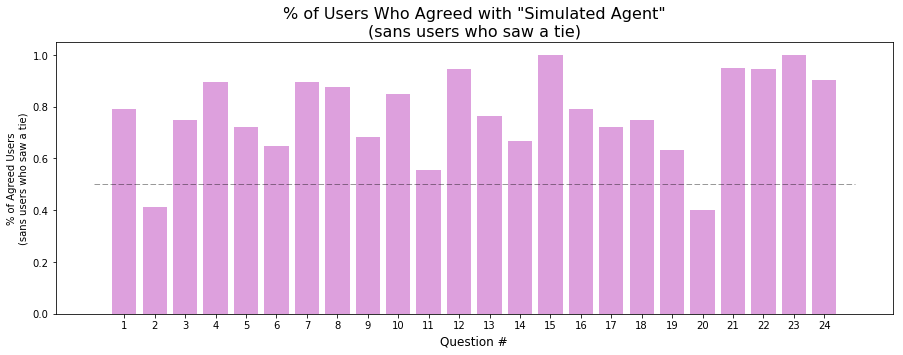

In [649]:
plt.figure(figsize=(15,5))
plt.title('% of Users Who Agreed with "Simulated Agent"\n(sans users who saw a tie)', size=16)

plt.bar(range(1,len(follow_df)+1),follow_df['%Yes'], color = 'plum')
plt.plot(range(0,len(follow_df)+2),[0.5] * 26, 'k', linestyle ='--', alpha = 0.4, linewidth = 1)

plt.xlabel('Question #', size=12)
plt.ylabel('% of Agreed Users\n(sans users who saw a tie)', size=10)
plt.xticks(range(1,len(follow_df)+1))
plt.savefig('pilot_agreedagents.png', bbox_inches='tight')
plt.show()

---

# Graphs of word proportions over time

In [570]:
import matplotlib.pyplot as plt
%matplotlib inline

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ctt45/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


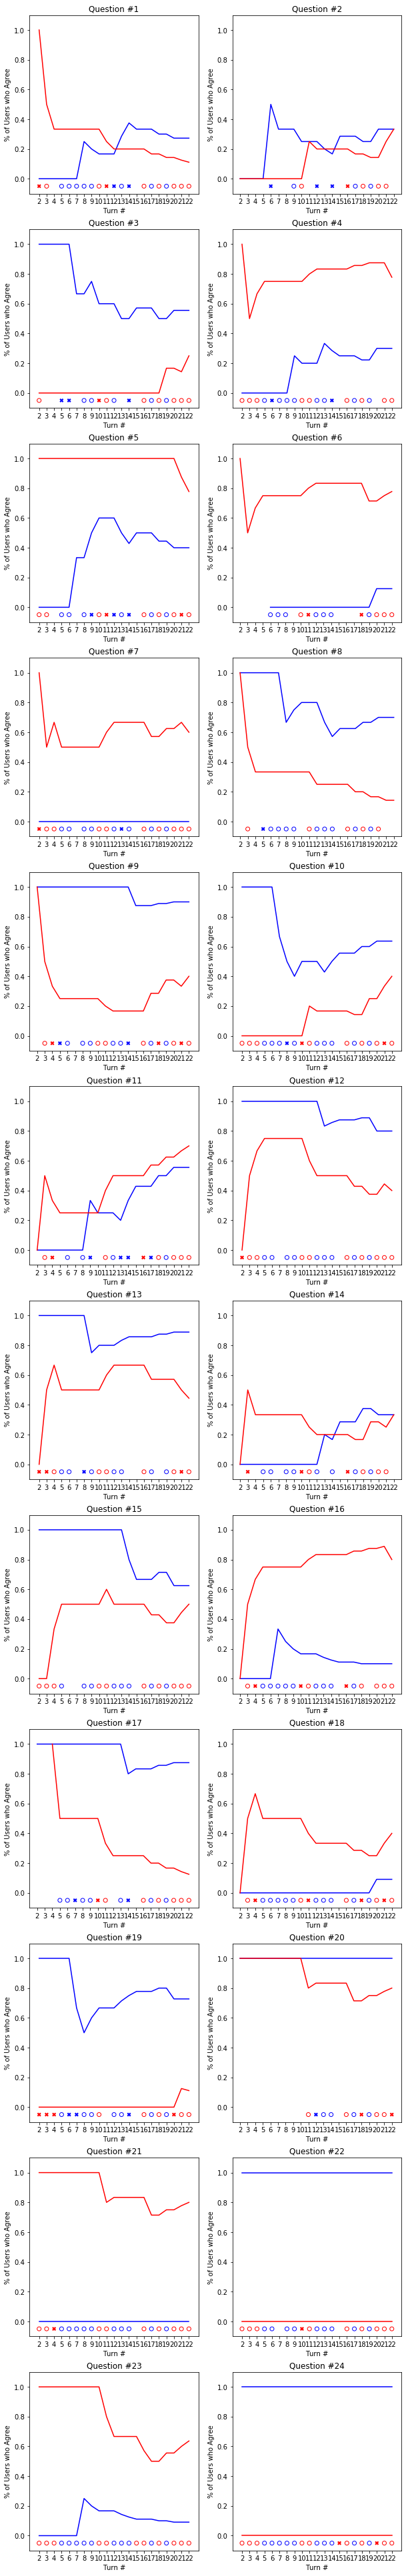

In [650]:
fig, ax = plt.subplots(12,2, figsize=(10,70))

for q in range(1,25):    
    rep_status = []
    dem_status = []
    rep_results = []
    dem_results = []
    abm_response = []

    for turn in range(0,len(data)):

        if turn > 1:
            dem_status += [np.mean(dem_results)]
            rep_status += [np.mean(rep_results)]
            if rep_status[-1] > dem_status[-1]:
                abm_response += [0]
            elif rep_status[-1] < dem_status[-1]:
                abm_response += [1]
            else:
                abm_response += [np.NaN]
                
        if data.loc[turn,'Political Stance'] > 0:
            if np.isnan(data.loc[turn,'resp_' + str(q)]) == False:
                dem_results.append(data.loc[turn,'resp_' + str(q)])
                
        else:
            if np.isnan(data.loc[turn,'resp_' + str(q)]) == False:
                rep_results.append(data.loc[turn,'resp_' + str(q)])
                

    r_right, r_wrong = [],[]
    d_right, d_wrong = [],[]

    rep_data = data[data['Political Stance'] < 0]['pred_'+str(q)].loc[2:]
    for i in rep_data.index:
        if np.isnan(rep_data.loc[i]) == False:
            if rep_data.loc[i] == 1:
                if dem_status[i-2] > rep_status[i-2]:
                    r_right += [i]
                elif dem_status[i-2] < rep_status[i-2]:
                    r_wrong += [i]
            else: 
                if dem_status[i-2] < rep_status[i-2]:
                    r_right += [i]
                elif dem_status[i-2] > rep_status[i-2]:
                    r_wrong += [i]
    dem_data = data[data['Political Stance'] > 0]['pred_'+str(q)].loc[2:]
    for i in dem_data.index:
        if np.isnan(dem_data.loc[i]) == False:
            if dem_data.loc[i] == 1:
                if dem_status[i-2] > rep_status[i-2]:
                    d_right += [i]
                elif dem_status[i-2] < rep_status[i-2]:
                    d_wrong += [i]
            else: 
                if dem_status[i-2] < rep_status[i-2]:
                    d_right += [i]
                elif dem_status[i-2] > rep_status[i-2]:
                    d_wrong += [i]
              
    col = (q-1)%2
    if q == 1:
        row = 0
    elif (q > 0) & ((q-1)%2 == 0):
        row += 1

    ax[row,col].plot(range(2,len(dem_status) + 2),dem_status, 'b')
    ax[row,col].plot(range(2,len(rep_status) + 2),rep_status, 'r')

    ax[row,col].scatter(r_right, [-0.05]*len(r_right), marker = 'o',facecolors='none', edgecolors='r')
    ax[row,col].scatter(r_wrong, [-0.05]*len(r_wrong), marker = 'X',facecolors='r',edgecolors='none')
    ax[row,col].scatter(d_right, [-0.05]*len(d_right), marker = 'o',facecolors='none', edgecolors='b')
    ax[row,col].scatter(d_wrong, [-0.05]*len(d_wrong), marker = 'X',facecolors='b',edgecolors='none')

    ax[row,col].set_title('Question #' + str(q))
    ax[row,col].set_ylim(-0.1,1.1)
    ax[row,col].set_xticks(range(2,len(dem_status)+2))
    ax[row,col].set_xlabel('Turn #')
    ax[row,col].set_ylabel('% of Users who Agree')

fig.show()
fig.savefig('pilot_responses_vs_pred.png', bbox_inches='tight')

---
# How often did their _own_ opinions align with the bar charts (soc inf)

AKA - How often did they agree if their ingroup agreement was > 0.5 or disagree if their ingroup agreemnet was < 0.5?

In [651]:
for q in range(1,20):    
    rep_status = []
    dem_status = []
    rep_results = []
    dem_results = []
    abm_response = []

    for turn in range(0,len(data)):                
        if turn > 1:
            dem_status += [np.mean(dem_results)]
            rep_status += [np.mean(rep_results)]
            if data.loc[turn,'Political Stance'] > 0:
                if dem_status[-1] > 0.5: 
                    abm_response += [1]
                elif dem_status[-1] < 0.5: 
                    abm_response += [0]
                else:
                    abm_response += [np.nan]
            elif data.loc[turn,'Political Stance'] < 0:
                if rep_status[-1] > 0.5: 
                    abm_response += [1]
                elif rep_status[-1] < 0.5: 
                    abm_response += [0]
                else:
                    abm_response += [np.nan]
                    
        if data.loc[turn,'Political Stance'] > 0:
            if np.isnan(data.loc[turn,'resp_' + str(q)]) == False:
                dem_results.append(data.loc[turn,'resp_' + str(q)])
        else:
            if np.isnan(data.loc[turn,'resp_' + str(q)]) == False:
                rep_results.append(data.loc[turn,'resp_' + str(q)])
                    
    check = []
    for i,v in enumerate(data.loc[2:, 'resp_' + str(q)]):
        if np.isnan(v) == False:
            if abm_response[i] == v:
                check += ['Yes']
            else:
                check += ['No']
        else:
            check += ['Tie Occurred']

    follow_dict[q] = dict(Counter(check))

follow_df = pd.DataFrame(follow_dict).transpose()
follow_df = follow_df.fillna(0)
follow_df['%Yes'] = follow_df['Yes'] / (follow_df['Yes'] + follow_df['No'])
follow_df = follow_df[['Yes','No','Tie Occurred','%Yes']]
follow_df

/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/ctt45/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Yes,No,Tie Occurred,%Yes
1,14.0,5.0,2.0,0.736842
2,10.0,7.0,4.0,0.588235
3,8.0,8.0,5.0,0.500000
4,12.0,6.0,3.0,0.666667
5,9.0,9.0,3.0,0.500000
6,12.0,5.0,4.0,0.705882
7,11.0,6.0,4.0,0.647059
8,10.0,5.0,6.0,0.666667
9,13.0,6.0,2.0,0.684211
10,9.0,11.0,1.0,0.450000


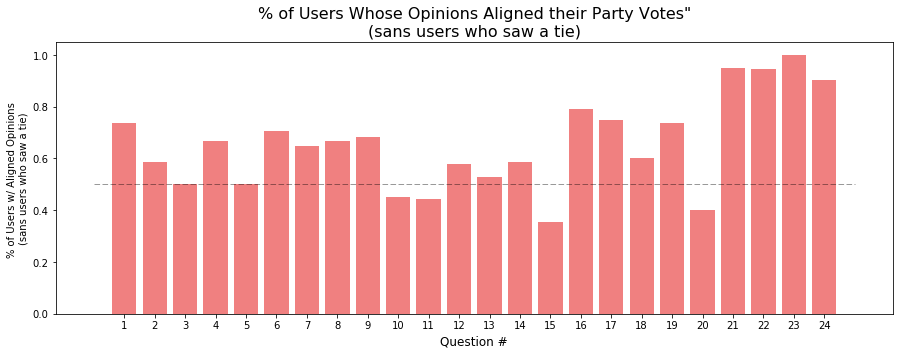

In [652]:
plt.figure(figsize=(15,5))
plt.title('% of Users Whose Opinions Aligned their Party Votes"\n(sans users who saw a tie)', size=16)

plt.bar(range(1,len(follow_df)+1),follow_df['%Yes'], color = 'lightcoral')
plt.plot(range(0,len(follow_df)+2),[0.5] * 26, 'k', linestyle ='--', alpha = 0.4, linewidth = 1)

plt.xlabel('Question #', size=12)
plt.ylabel('% of Users w/ Aligned Opinions \n(sans users who saw a tie)', size=10)
plt.xticks(range(1,len(follow_df)+1))
plt.savefig('pilot_alignedagents.png', bbox_inches='tight')
plt.show()

In [653]:
np.mean(follow_df['%Yes'])

0.654916191622848